# Final Project

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import plotly.express as px
import os
import warnings

# Local server SQL database
import sqlite3 as sq

# Setting of Large numbers format
pd.options.display.float_format = '{:,.2f}'.format

# Set data frame display max 10 rows
pd.set_option('display.max_rows', 10)

# Warning is suppressed
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Transformation (continued from milestones)

In order to merge the tables in the way I'd like and to have them nicely formatted for SQL, I'm going to make a few changes to the dataframes first.

In [3]:
# import data from CSV saved via flat file milestone
flat_df = pd.read_csv('/Users/debane/Documents/MS Data Science/540 Data Preparation/Final Project/FlatFileDF.csv')#

In [4]:
#view columns
flat_df.columns

Index(['State', 'Year', 'Month', 'Indicator', 'Data Value', 'State Name',
       'Date', 'Date_parsed'],
      dtype='object')

In [5]:
# add suffix to annotate which dataframe the values came from
flat_df = flat_df.add_suffix('_flat')

In [6]:
# renaming StateName to be the same for every dataframe for ease of joining tables  
flat_df = flat_df.rename(columns={"State Name_flat": "StateName"})

In [7]:
#update Data Value to have no space for ease of calling variable
flat_df = flat_df.rename(columns={"Data Value_flat": "Data_Value_flat"})

In [8]:
# view df info
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State_flat        3975 non-null   object 
 1   Year_flat         3975 non-null   int64  
 2   Month_flat        3975 non-null   object 
 3   Indicator_flat    3975 non-null   object 
 4   Data_Value_flat   3975 non-null   float64
 5   StateName         3975 non-null   object 
 6   Date_flat         3975 non-null   object 
 7   Date_parsed_flat  3975 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 248.6+ KB


In [9]:
# import data from CSV saved via HTML milestone
html_df = pd.read_csv('/Users/debane/Documents/MS Data Science/540 Data Preparation/Final Project/HTMLdf.csv')

In [10]:
# view columns
html_df.columns

Index(['StateName', 'State', 'County FIPS Code',
       'Opioid Dispensing Rate per 100'],
      dtype='object')

In [11]:
# add suffix to annotate which dataframe the values came from
html_df = html_df.add_suffix('_html')

In [12]:
# renaming StateName to be the same for every dataframe for ease of joining tables  
html_df = html_df.rename(columns={"StateName_html": "StateName"})

In [13]:
#update to remove space for ease of calling variable
html_df = html_df.rename(columns={"County FIPS Code_html":"County_FIPS_Code_html"})

In [14]:
#update to remove space for ease of calling variable
html_df = html_df.rename(columns={"Opioid Dispensing Rate per 100_html" : "Opioid_Dispensing_Rate_per_100_html"})

In [15]:
# view df info
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   StateName                            3081 non-null   object 
 1   State_html                           3081 non-null   object 
 2   County_FIPS_Code_html                3081 non-null   int64  
 3   Opioid_Dispensing_Rate_per_100_html  3081 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 96.4+ KB


In [16]:
# import data from CSV saved via API milestone
api_df = pd.read_csv('/Users/debane/Documents/MS Data Science/540 Data Preparation/Final Project/APIdf.csv')

In [17]:
api_df.columns

Index(['StateName', 'Population', 'Deaths_Total_2019', 'Death_Rate_Per_100k',
       'GEO_ID', 'Housing_Unit_Estimate', 'state', 'Housing_Available'],
      dtype='object')

In [18]:
# add suffix to annotate which dataframe the values came from
api_df = api_df.add_suffix('_api')

In [19]:
# renaming StateName to be the same for every dataframe for ease of joining tables  
api_df = api_df.rename(columns={"StateName_api": "StateName"})

In [20]:
#view df information
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StateName                  51 non-null     object 
 1   Population_api             51 non-null     int64  
 2   Deaths_Total_2019_api      51 non-null     int64  
 3   Death_Rate_Per_100k_api    51 non-null     float64
 4   GEO_ID_api                 51 non-null     object 
 5   Housing_Unit_Estimate_api  51 non-null     int64  
 6   state_api                  51 non-null     int64  
 7   Housing_Available_api      51 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.3+ KB


## Load each dataset into SQL Lite as an individual table and then join the datasets together

In [21]:
import sqlite3

connection = sqlite3.connect('FinalProject.db')
 
# create cursor object
cursor = connection.cursor()

import pandas as pd
import pyodbc

# Connect to SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Database=test_database;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

# Create Table
cursor.execute('''
            CREATE TABLE flat_df (
            State_flat VARCHAR(255), 
            Year_flat int, 
            Month_flat VARCHAR(255), 
            Indicator_flat VARCHAR(255),
            Data_Value_flat int, 
            StateName VARCHAR(255), 
            Date_flat int, 
            Date_parsed_flat VARCHAR(255))
               ''')

# Insert DataFrame to Table
for row in flat_df.itertuples():
    cursor.execute('''
                INSERT INTO flat_df (State_flat, Year_flat, Month_flat, Indicator_flat,
       Data Value_flat, StateName, Date_flat, Date_parsed_flat],
      dtype='object')
                VALUES (?,?,?,?,?,?,?,?)
                ''',
                row.State_flat,
                row.Year_flat,
                row.Month_flat,
                row.Indicator_flat,
                row.Data_Value_flat,
                row.StateName, 
                row.Date_flat, 
                row.Date_parsed_flat
                )
conn.commit()

In [22]:
# define variable for Table Name
table_name = 'FlatFile'
# connect to database 
conn = sqlite3.connect('mydb.sqlite')
# define query to create table
query = f'Create table if not Exists {table_name} (State_flat VARCHAR(255), Year_flat int, Month_flat VARCHAR(255), Indicator_flat VARCHAR(255), Data_Value_flat float, StateName VARCHAR(255), Date_flat VARCHAR(255), Date_parsed_flat VARCHAR(255))'
# execute query
conn.execute(query)
# design table to fill with the specified dataframe
flat_df.to_sql(table_name,conn,if_exists='replace',index=False)
# commit to database
conn.commit()

In [23]:
#read table from SQL
r_df = pd.read_sql("select * from FlatFile",conn)
print(r_df)

     State_flat  Year_flat Month_flat                  Indicator_flat   
0            AK       2015      April  Number of Drug Overdose Deaths  \
1            AK       2015     August  Number of Drug Overdose Deaths   
2            AK       2015   December  Number of Drug Overdose Deaths   
3            AK       2015   February  Number of Drug Overdose Deaths   
4            AK       2015    January  Number of Drug Overdose Deaths   
...         ...        ...        ...                             ...   
3970         YC       2020    October  Number of Drug Overdose Deaths   
3971         YC       2020  September  Number of Drug Overdose Deaths   
3972         YC       2021   February  Number of Drug Overdose Deaths   
3973         YC       2021    January  Number of Drug Overdose Deaths   
3974         YC       2021      March  Number of Drug Overdose Deaths   

      Data_Value_flat      StateName       Date_flat Date_parsed_flat  
0              126.00         Alaska      April 201

In [24]:
# repeat steps from above with HTML dataframe
table_name = 'HTMLfile'
conn = sqlite3.connect('mydb.sqlite')
query = f'Create table if not Exists {table_name} (StateName VARCHAR(255), State_html VARCHAR(255), County_FIPS_Code_html int, Opioid_Dispensing_Rate_per_100_html float)'
conn.execute(query)
html_df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()

In [25]:
r_df = pd.read_sql("select * from HTMLfile",conn)
print(r_df)

     StateName State_html  County_FIPS_Code_html   
0      Alabama         AL                   1001  \
1      Alabama         AL                   1003   
2      Alabama         AL                   1005   
3      Alabama         AL                   1007   
4      Alabama         AL                   1009   
...        ...        ...                    ...   
3076   Wyoming         WY                  56037   
3077   Wyoming         WY                  56039   
3078   Wyoming         WY                  56041   
3079   Wyoming         WY                  56043   
3080   Wyoming         WY                  56045   

      Opioid_Dispensing_Rate_per_100_html  
0                                   98.30  
1                                   65.00  
2                                   22.80  
3                                   24.80  
4                                   22.80  
...                                   ...  
3076                                70.00  
3077                   

In [26]:
# repeat steps from above with API dataframe
table_name = 'APIfile'
conn = sqlite3.connect('mydb.sqlite')
query = f'Create table if not Exists {table_name} (StateName VARCHAR(255), State_html VARCHAR(255), County_FIPS_Code_html int, Opioid_Dispensing_Rate_per_100_html int)'
conn.execute(query)
api_df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()

r_df = pd.read_sql("select * from APIfile",conn)
print(r_df)

In [27]:
# create cursor object
cur = conn.cursor()

In [28]:
# use cursor function to combine tables on "StateName"
cur.execute('''SELECT *
  FROM FlatFile
  INNER JOIN HTMLfile
  ON FlatFile.StateName = HTMLfile.StateName
  INNER JOIN APIfile
  ON HTMLfile.StateName = APIfile.StateName''')

# convert to dataframe and fetch all
df = pd.DataFrame(cur.fetchall())
# define column names
df.columns = [x[0] for x in cur.description]
df

,State_flat,Year_flat,Month_flat,Indicator_flat,Data_Value_flat,StateName,Date_flat,Date_parsed_flat,StateName,State_html,County_FIPS_Code_html,Opioid_Dispensing_Rate_per_100_html,StateName,Population_api,Deaths_Total_2019_api,Death_Rate_Per_100k_api,GEO_ID_api,Housing_Unit_Estimate_api,state_api,Housing_Available_api
0,AK,2015,April,Number of Drug Overdose Deaths,126.00,Alaska,April 2015,2015-04-01,Alaska,AK,2013,9.60,Alaska,731545,4819,6.57,0400000US02,319854,2,2.29
1,AK,2015,April,Number of Drug Overdose Deaths,126.00,Alaska,April 2015,2015-04-01,Alaska,AK,2016,2.10,Alaska,731545,4819,6.57,0400000US02,319854,2,2.29
2,AK,2015,April,Number of Drug Overdose Deaths,126.00,Alaska,April 2015,2015-04-01,Alaska,AK,2020,47.20,Alaska,731545,4819,6.57,0400000US02,319854,2,2.29
3,AK,2015,April,Number of Drug Overdose Deaths,126.00,Alaska,April 2015,2015-04-01,Alaska,AK,2050,8.80,Alaska,731545,4819,6.57,0400000US02,319854,2,2.29
4,AK,2015,April,Number of Drug Overdose Deaths,126.00,Alaska,April 2015,2015-04-01,Alaska,AK,2060,6.40,Alaska,731545,4819,6.57,0400000US02,319854,2,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231070,WY,2021,March,Number of Drug Overdose Deaths,93.00,Wyoming,March 2021,2021-03-01,Wyoming,WY,56037,70.00,Wyoming,578759,4971,8.60,0400000US56,280291,56,2.06
231071,WY,2021,March,Number of Drug Overdose Deaths,93.00,Wyoming,March 2021,2021-03-01,Wyoming,WY,56039,50.60,Wyoming,578759,4971,8.60,0400000US56,280291,56,2.06
231072,WY,2021,March,Number of Drug Overdose Deaths,93.00,Wyoming,March 2021,2021-03-01,Wyoming,WY,56041,60.00,Wyoming,578759,4971,8.60,0400000US56,280291,56,2.06
231073,WY,2021,March,Number of Drug Overdose Deaths,93.00,Wyoming,March 2021,2021-03-01,Wyoming,WY,56043,40.20,Wyoming,578759,4971,8.60,0400000US56,280291,56,2.06


# Visualizations

Line plot to visualize the increase in overdose deaths over time.

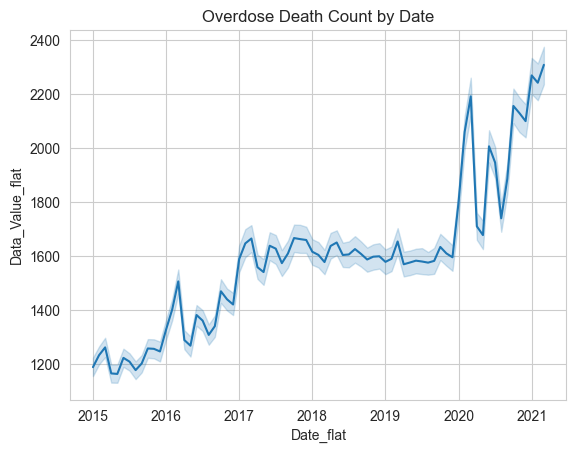

In [34]:
sns.set_style('whitegrid')
g = sns.lineplot(x='Date_flat',
              y = 'Data_Value_flat',
              data=df)
#g = (g.set_axis_labels(x ='Date', y ='Overdose Death Count'), set(xlim=(0,20),ylim=(0,100)))
#g = g.set(xticks=[1, 13, 25, 37, 49, 61, 73], xticklabels=[2015, 2016, 2017, 2018, 2019, 2020, 2021])
g = g.set(xticks=[0, 12, 24, 36, 48, 60, 72], xticklabels=[2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.title('Overdose Death Count by Year')
plt.show(g)

Barplot to visualize states' death rates by overdose death rate per 100k people for the last 7 years.

Text(0.5, 0, 'State')

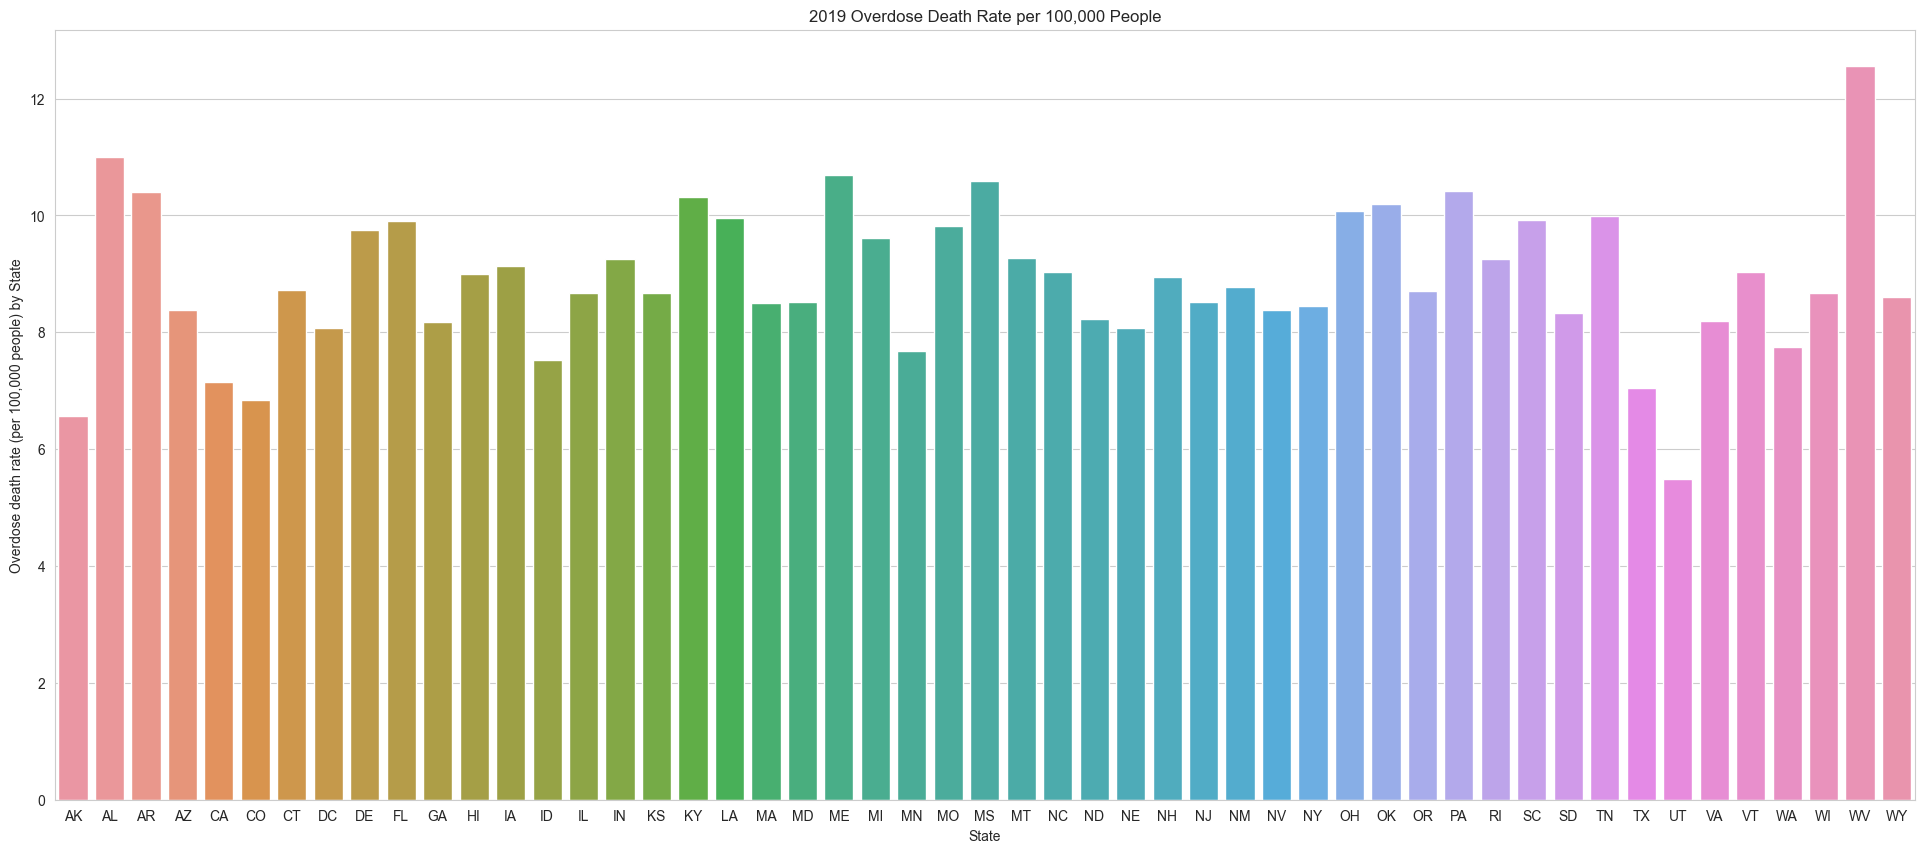

In [36]:
# Set the width and height of the figure
plt.figure(figsize=(24,10))

# Add title
plt.title("2019 Overdose Death Rate per 100,000 People")

# Bar chart code
sns.barplot(x = df['State_html'], y=df['Death_Rate_Per_100k_api'])

# Add label for axes
plt.ylabel("Overdose death rate (per 100,000 people) by State")
plt.xlabel('State')

Create barplot to visualize states' death rates by overdose for the last 7 years in total.

Text(0.5, 0, 'Total Deaths from Overdoses 2015-2021')

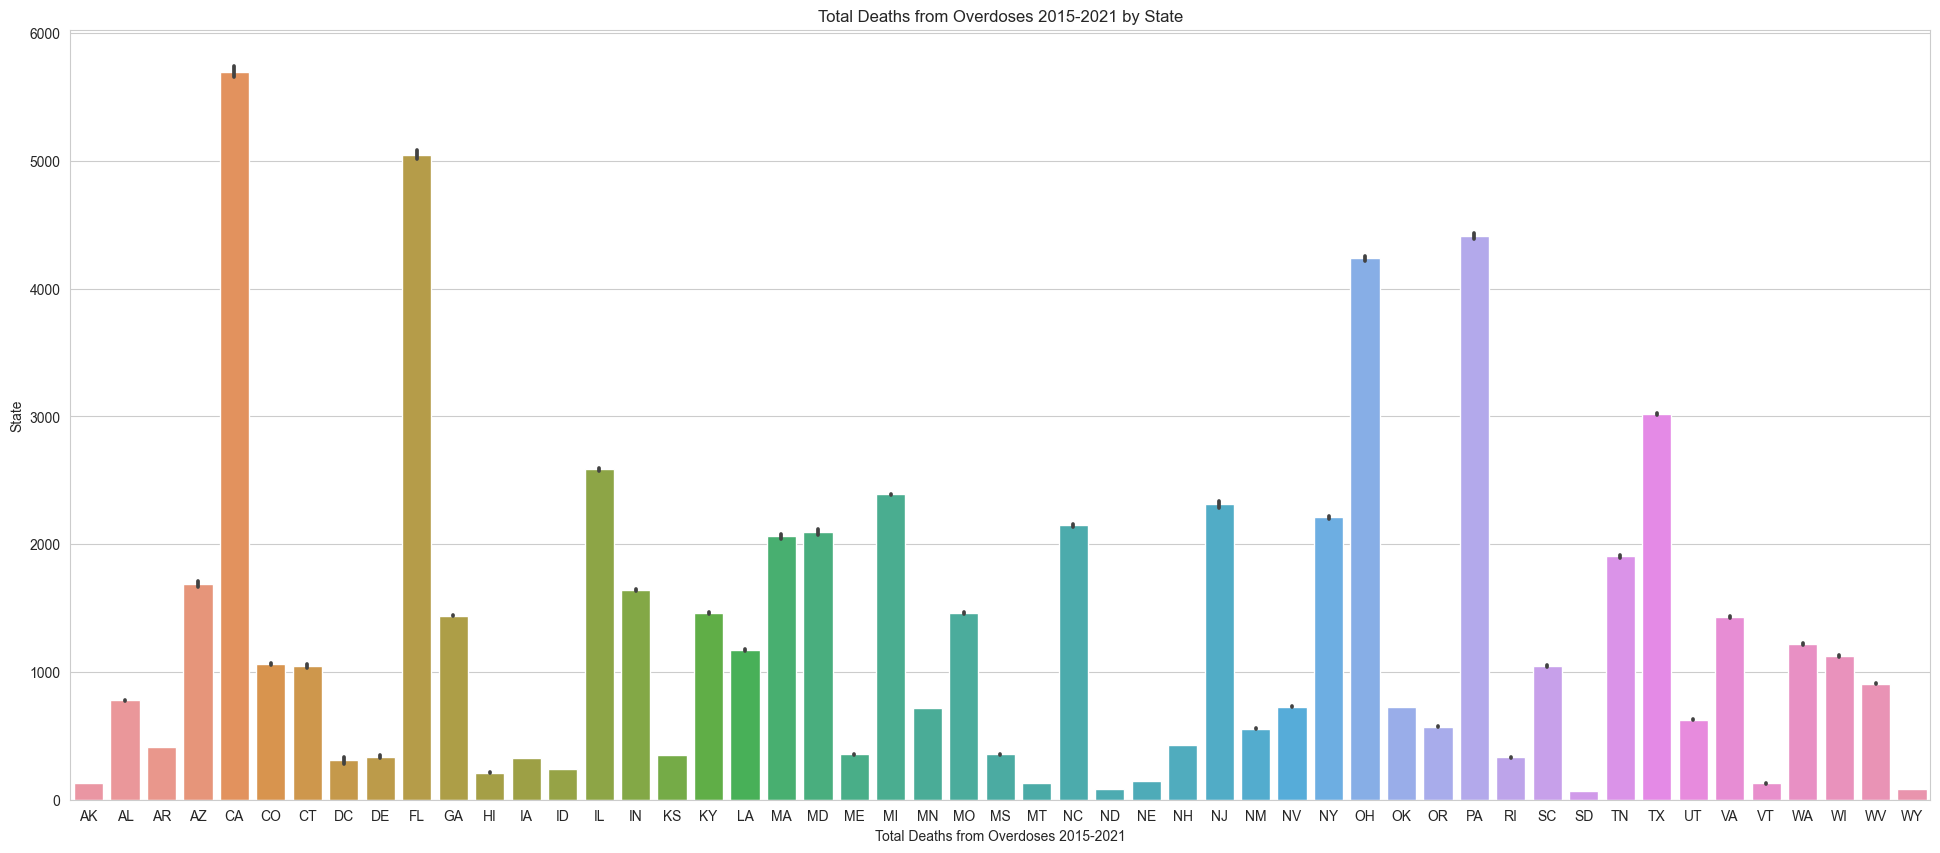

In [42]:
#set the width and height of the figure
plt.figure(figsize=(24,10))

#add title
plt.title("Total Deaths from Overdoses 2015-2021 by State")

#bar chart code
sns.barplot(x=df['State_html'], y=df['Data_Value_flat'])

#add label for axes
plt.ylabel("State")
plt.xlabel("Total Deaths from Overdoses 2015-2021")

I tried to make a histogram to explore the ditribution of opioid dispensing rates but I'm not sure this has information that would be of value to me. I wanted to keep it included here though for future reference.

(array([1.45425e+05, 6.86250e+04, 1.26750e+04, 3.15000e+03, 4.50000e+02,
        3.00000e+02, 1.50000e+02, 7.50000e+01, 7.50000e+01, 1.50000e+02]),
 array([  0.  ,  40.67,  81.34, 122.01, 162.68, 203.35, 244.02, 284.69,
        325.36, 366.03, 406.7 ]),
 <BarContainer object of 10 artists>)

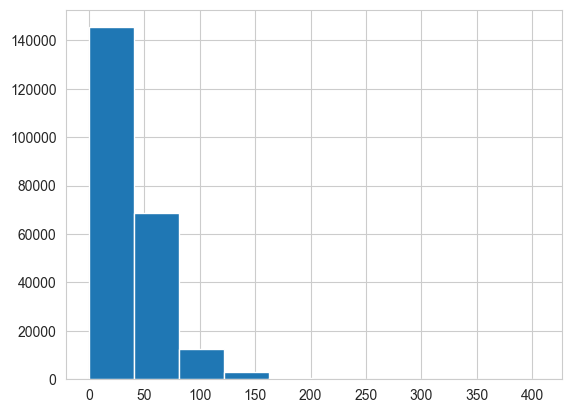

In [46]:
plt.hist(df['Opioid_Dispensing_Rate_per_100_html'])

The following cell holds attempts at plotting the rates of opioid overdoses to the rates of housing availability that I wasn't able to find a clean method for. I wanted to see if there was a correlation between lack of shelter and opioid overdose based on the data I had. This would be interesting to see in the future and hypotheses such as this could provide meaningful insight into how populations can better prevent opioid illness and overdose deaths. I am keeping it for future reference.

#Set the width and height of the figure
plt.figure(figsize=(24,10))

#Add title
plt.title("Housing Availability")

#Bar chart code
#sns.scatterplot(x=df['Housing_Available_api'], y=df['Data_Value_flat'])
#sns.barplot(x='Housing_Available_api', y='Data_Value_flat', hue='State_flat', data=df)
sns.relplot(data=df, x=(df['Housing_Available_api'] >= 2000), y='Data_Value_flat', hue='State_flat', sorted_by())
#sns.factorplot("sex", "survival_rate", col="class", data=df, kind="bar")

#Add label for axes
plt.ylabel("Housing Rate vs. Overdose Death Rate")

## Project Summary

This was a fascinating exploration in data preparation. I struggled pretty intensely with the HTML and API retrievals, and am pretty shaky with SQL, but I really appreciated how the course was laid out to practice these skills in the assignments and then apply them in our projects. It has been a wild ride, but I feel like I gained many skils during this project. I am really grateful to have been able to merge my previous research focus (opioid use and care) with these new skills. I am quick to recognize how novice I am in this field and that my approaches are elementary, but hypothesizing about what discoveries could be made using machine learning in this field has been very stimulating for me. The government sourced data I used was very comprehensive in its population representation, but limited on specifics, so I realized that I was trying to draw correlations that were not exactly able to be sourced from the information I had, but the process of sourcing, cleaning, and transforming the data really enhanced my skills. <br>

Because the original data was from the CDC, it was pretty clean, but there were several transformations I applied to make it specific to my project. The ethical implications of this process (like removing certain columns or selecting for a specific indicator) varied based on how I was intending to apply the information, like to use the different population metrics to compare to death/overdose/and prescription rates. Becuase the goal of this project was to able to clean and merge, I felt confident that selecting only the pieces of information I wanted to review would not be ethically. Luckily, the sources I chose already took into consideration the concern for privacy and confidentiality of the subjects, so there were no personal identifiers available to me. The data is all publicly available through government websites (CDC and Census Bureau), so I felt confident that there are no ownership issues. <br>

Ideally, I wanted to use it to draw correlations between socioeconomic status of a population, prevalence of opioids via prescription in a region, and per capita mortality rate from opioid-related overdoses. In this ideal scenario, this would provide insight into locations for greater opioid care (care clinics, recovery options, community education). I really enjoyed the cleaning and transformation stages, and am happy that the exploration and preparation for modeling is becoming more enjoyable. I'm certainly gaining greater proficiency and am looking forward to honing my skills further. <br>

In accordance with data availabilty and ownership, I want to be clear to cite my sources. This dataset has been collected by the [CDC](https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm). Their suggested citation is: <br>
*Ahmad FB, Cisewski JA, Rossen LM, Sutton P. Provisional drug overdose death counts. National Center for Health Statistics. 2023.
</br>
Designed by LM Rossen, A Lipphardt, FB Ahmad, JM Keralis, and Y Chong: National Center for Health Statistics.* <br>

Additionally, I breifly followed along to a Kaggle notebook by [Craig Chilvers](https://www.kaggle.com/code/craigchilvers/opioids-in-the-us-initial-data-cleaning/notebook). 